##Introduction: Predicting UPDRS Motor Score Using Multi-Modal Data: An Exploration of Machine Learning Models

**Experiment 2: Advanced Model Experimentation and Feature Selection**

In this experiment, we continued our exploration of machine learning models for predicting UPDRS Motor Scores using the previously selected features. We focused on optimizing LightGBM and XGBoost models through advanced hyperparameter tuning using the Optuna framework.

While both LightGBM and XGBoost showed improvement with tuning compared to our initial experiments, their performance, as measured by key regression metrics, remained below that of the untuned Random Forest model from the previous experiment.

**Model Performance Metrics:**

*   **LightGBM (Tuned):**
    *   MAE: 6.539
    *   MSE: 74.711
    *   RMSE: 8.644
    *   R²: 0.495

*   **XGBoost (Tuned):**
    *   MAE: 6.525
    *   MSE: 76.952
    *   RMSE: 8.772
    *   R²: 0.480

*   **Random Forest (Slight Tunning):**
    *   MAE: 5.681
    *   MSE: 56.947
    *   RMSE: 7.546
    *   R²: 0.579

Based on these results, the Random Forest model, even without extensive tuning in this experiment, appears to be the most promising model among those tested so far for this prediction task. Further investigation into the Random Forest model and potentially more advanced tuning or feature engineering could yield even better results.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("final_df_cleaned.csv")

In [ ]:
# Step 1: Drop irrelevant columns
drop_cols = ['PATNO', 'NHY', 'EVENT_ID_y']

df2 = df.drop(columns=drop_cols)

print("After dropping irrelevant columns:")
print(df2.shape)
print(df2.columns)

After dropping irrelevant columns:
(1716, 106)
Index(['SEX', 'AGE', 'Brain_Stem', 'Right_choroid_plexus',
       'Right_Cerebellum_White_Matter', 'Left_Cerebellum_Cortex',
       'Left_choroid_plexus', 'Left_Pallidum', 'Left_Thalamus',
       'Right_VentralDC',
       ...
       'Putamen_Total', 'Caudate_Total', 'Putamen_Asym', 'Caudate_Asym',
       'CortexVol_norm', 'TotalGrayVol_norm', 'Hippocampus_Total_norm',
       'Amygdala_Total_norm', 'Caudate_Total_norm', 'Putamen_Total_norm'],
      dtype='object', length=106)


In [ ]:
selected_features = ['AGE', 'Left_choroid_plexus', 'Left_Accumbens_area',
       'lhCerebralWhiteMatterVol', 'CSF', 'lh_entorhinal', 'lh_middletemporal',
       'lh_temporalpole', 'lh_insula', 'rh_bankssts', 'rh_entorhinal',
       'rh_lateraloccipital', 'rh_parahippocampal', 'rh_parsorbitalis',
       'rh_pericalcarine', 'rh_rostralanteriorcingulate',
       'rh_rostralmiddlefrontal', 'rh_insula', 'Putamen_Total',
       'Caudate_Total', 'Putamen_Asym', 'Caudate_Asym', 'TotalGrayVol_norm',
       'Hippocampus_Total_norm', 'Putamen_Total_norm']

In [ ]:
X_selected = df2[selected_features]

In [ ]:
X_selected.head(2)

,AGE,Left_choroid_plexus,Left_Accumbens_area,lhCerebralWhiteMatterVol,CSF,lh_entorhinal,lh_middletemporal,lh_temporalpole,lh_insula,rh_bankssts,...,rh_rostralanteriorcingulate,rh_rostralmiddlefrontal,rh_insula,Putamen_Total,Caudate_Total,Putamen_Asym,Caudate_Asym,TotalGrayVol_norm,Hippocampus_Total_norm,Putamen_Total_norm
0,69.1,747.9,160.4,248312.0,1039.0,2.805,2.271,2.954,2.751,2.752,...,2.848,2.234,2.848,5.57,6.42,-0.055655,0.068536,0.380586,0.005046,0.005288
1,65.1,716.5,333.4,279750.0,1481.8,3.539,2.719,3.715,2.989,2.391,...,2.520,2.064,2.756,1.45,3.92,-0.103448,-0.020408,0.378124,0.005145,0.007797


In [ ]:

y = df2['NP3TOT']


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.6 MB/s eta 0:00:00


In [11]:
# Import necessary libraries for model training and evaluation
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Data Splitting
# Split the data into training and testing sets.
# X contains the features, and y contains the target variable (UPDRS total score).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Best Hyperparameters
# These parameters were obtained from a prior hyperparameter tuning process (e.g., using Optuna).
# The random_state is included for reproducibility.
best_params = {
    'n_estimators': 120,
    'learning_rate': 0.09374665747807125,
    'max_depth': 3,
    'num_leaves': 255,
    'min_child_samples': 10,
    'subsample': 0.9044127088659597,
    'colsample_bytree': 0.7020621650435623,
    'random_state': 42
}

# Model Training
# Initialize and train the LightGBM Regressor model using the best hyperparameters on the training data.
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Prediction
# Make predictions on the test set to evaluate the model's performance on unseen data.
y_pred = model.predict(X_test)

# Model Evaluation
# Calculate common regression evaluation metrics:
# MAE (Mean Absolute Error): Average absolute difference between actual and predicted values.
# MSE (Mean Squared Error): Average squared difference between actual and predicted values.
# RMSE (Root Mean Squared Error): Square root of MSE, providing error in the same units as the target.
# R² (R-squared): Proportion of the variance in the dependent variable that is predictable from the independent variables.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Expected Output:
# The script will print the calculated MAE, MSE, RMSE, and R² values for the LGBM model's predictions on the test set.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6367
[LightGBM] [Info] Number of data points in the train set: 1372, number of used features: 25
[LightGBM] [Info] Start training from score 12.021866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**Reasoning**:
The first code cell has been commented. I will now add comments to the second code cell which performs SHAP feature selection using the trained LightGBM model. I will also correct the variable name from X_selected to X.



In [12]:
# Import necessary libraries for SHAP and data manipulation
import shap
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import numpy as np # Imported in the previous cell, no need to import again

# Data Splitting (using the full feature set X)
# Ensure the data is split consistently for reproducibility if not done previously.
# X contains the features, and y contains the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit LightGBM with Optimized Parameters
# Train the LightGBM model using the previously determined best parameters.
# These parameters aim to provide a good balance of performance and generalization.
model = LGBMRegressor(
    n_estimators=120,
    learning_rate=0.09375,
    max_depth=3,
    num_leaves=255,
    min_child_samples=10,
    subsample=0.9044,
    colsample_bytree=0.7021,
    random_state=42
)
model.fit(X_train, y_train)

# SHAP Feature Selection
# Use SHAP (SHapley Additive exPlanations) to understand the contribution of each feature to the model's predictions.
# TreeExplainer is optimized for tree-based models like LightGBM.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Compute Feature Importance based on SHAP values
# Calculate the mean absolute SHAP value for each feature. This represents the average magnitude of a feature's impact on the output.
shap_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='importance', ascending=False) # Sort features by importance in descending order.

# Get Top 20 Features
# Select the top 20 most important features based on the calculated SHAP importance.
top_20_features = shap_importance['feature'].head(20).tolist()

# Subset Data with Top 20 Features
# Create a new DataFrame containing only the selected top 20 features from the original X.
X_top20 = X[top_20_features]

# Expected Output:
# The code will train the LightGBM model, compute SHAP values, calculate feature importance, identify the top 20 features, and create a new DataFrame (X_top20) with these features.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6367
[LightGBM] [Info] Number of data points in the train set: 1372, number of used features: 25
[LightGBM] [Info] Start training from score 12.021866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**Reasoning**:
The second code cell has been commented and executed successfully. I will now add comments to the third code cell which visualizes the SHAP feature importance.



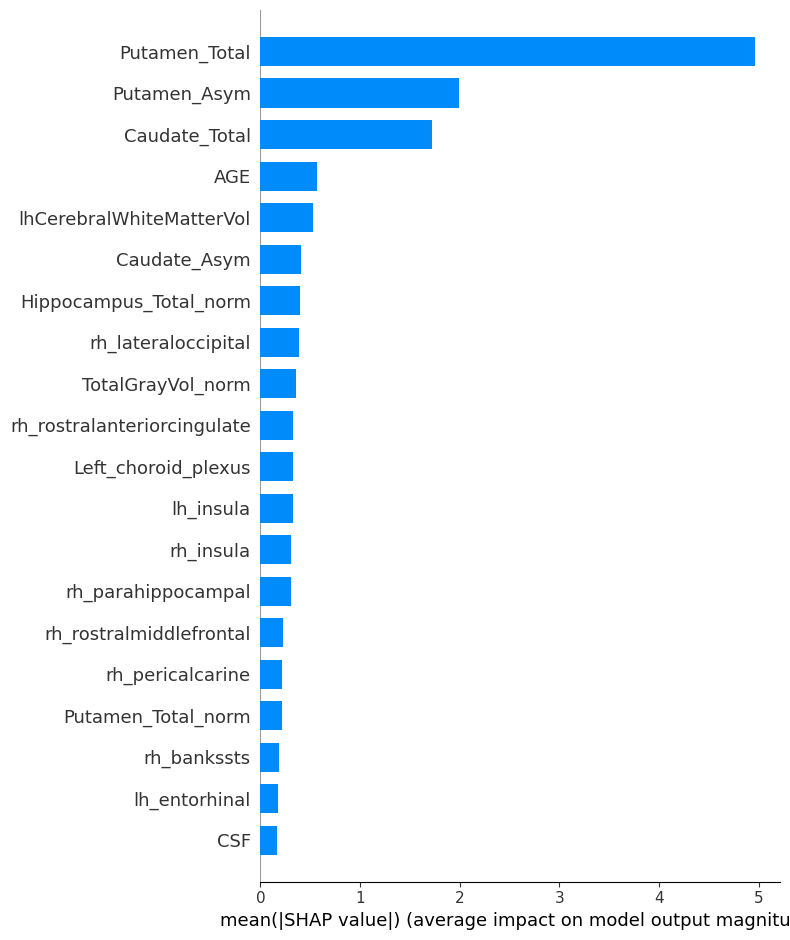

In [13]:
# SHAP Summary Plot (Bar Plot)
# Generate a bar plot showing the mean absolute SHAP value for each feature.
# This plot provides a global view of feature importance, with the most important features at the top.
# max_display=20 limits the plot to the top 20 features, which were previously identified.
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=20)

# Expected Output:
# A bar plot displaying the top 20 features ranked by their average impact (mean absolute SHAP value) on the model output.

**Reasoning**:
The third code cell has been commented and executed. I will now add comments to the fourth code cell, which trains and evaluates LightGBM and XGBoost models using the top 20 selected features.



In [14]:
# Import necessary libraries for modeling and evaluation
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Imported in previous cells

# Data Splitting (using the top 20 features)
# Split the dataset containing only the top 20 features into training and testing sets.
# X_top20 contains the subset of features, and y contains the target variable.
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2, random_state=42)

# --- LightGBM Model with Optimized Parameters ---
# Initialize and train a LightGBM Regressor model using the previously optimized parameters.
# This model is trained on the reduced feature set (top 20).
lgb_model = LGBMRegressor(
    n_estimators=120,
    learning_rate=0.09375,
    max_depth=3,
    num_leaves=255,
    min_child_samples=10,
    subsample=0.9044,
    colsample_bytree=0.7021,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# --- XGBoost Model with Similar Tuning ---
# Initialize and train an XGBoost Regressor model with hyperparameters similar to the optimized LightGBM.
# This allows for a direct comparison of the two boosting algorithms on the same feature set.
xgb_model = XGBRegressor(
    n_estimators=120,
    learning_rate=0.09375,
    max_depth=3,
    subsample=0.9044,
    colsample_bytree=0.7021,
    random_state=42,
    verbosity=0 # Suppress verbose output during training
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# --- Evaluation Function ---
# Define a helper function to calculate and print evaluation metrics for a given model.
# This function computes MAE, MSE, RMSE, and R² and presents them in a formatted way.
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

# Evaluate both models
# Call the evaluation function for both the LightGBM and XGBoost models.
evaluate_model("LightGBM", y_test, y_pred_lgb)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# Expected Output:
# The script will print the evaluation metrics (MAE, MSE, RMSE, R²) for both the LightGBM and XGBoost models trained on the top 20 features.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 1372, number of used features: 20
[LightGBM] [Info] Start training from score 12.021866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [15]:
# Import necessary libraries for Random Forest and evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Imported in previous cells
import pandas as pd # Imported in previous cells

# Data Splitting with Stratification (using the top 20 features)
# Split the data containing only the top 20 features into training and testing sets.
# Use stratified sampling based on quantiles of the target variable (y - UPDRS total score)
# to ensure that the distribution of the target variable is similar in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_top20, y,
    test_size=0.2,
    random_state=42,
    stratify=pd.qcut(y, q=3)  # Stratify by creating 3 quantiles of y
)

# --- Random Forest Model with Comparable Tuning ---
# Initialize and train a Random Forest Regressor model.
# Parameters are set to be somewhat comparable to the boosting models, though RF generally requires different tuning.
# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of the trees.
# min_samples_split: Minimum number of samples required to split an internal node.
# max_features: The number of features to consider when looking for the best split. 0.7 means 70% of features.
# bootstrap: Whether bootstrap samples are used when building trees.
# random_state: For reproducibility.
# n_jobs: Number of cores to use for training (-1 uses all available cores).
rf_model = RandomForestRegressor(
    n_estimators=200,        # More trees than LightGBM/XGBoost (RF needs more for stability)
    max_depth=7,             # Deeper than LGBM/XGB (since RF splits differently)
    min_samples_split=5,     # Prevent overfitting (analogous to min_child_samples)
    max_features=0.7,        # Similar to colsample_bytree (70% feature subsampling)
    bootstrap=True,          # Enable bagging (like subsample in boosting)
    random_state=42,
    n_jobs=-1               # Use all cores
)

# Train the Random Forest model on the training data.
rf_model.fit(X_train, y_train)

# Predict on the test set.
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model using the previously defined function.
# Define evaluation function again here to ensure it's available in this cell context if run independently.
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {np.sqrt(mse):.3f}")
    print(f"R²: {r2:.3f}")

evaluate_model("Random Forest", y_test, y_pred_rf)

# Expected Output:
# The script will print the evaluation metrics (MAE, MSE, RMSE, R²) for the Random Forest model trained on the top 20 features with stratified splitting.


Random Forest Results:
MAE: 5.681
MSE: 56.947
RMSE: 7.546
R²: 0.579


**Reasoning**:
Identify all imported libraries and create a requirements.txt file with them.



In [16]:
import pkg_resources
import sys

# Get a list of all installed packages and their versions
installed_packages = {p.project_name: p.version for p in pkg_resources.working_set}

# List of libraries used in the provided script (based on imports)
# It's best practice to specify major versions if possible, but listing just the names is a good start.
required_libraries = [
    'lightgbm',
    'sklearn',
    'numpy',
    'pandas',
    'shap',
    'xgboost' # Added xgboost as it is used in one of the cells
]

# Generate requirements.txt content with installed versions
requirements_content = []
for lib in required_libraries:
    try:
        version = installed_packages.get(lib.replace('-', '_'), installed_packages.get(lib, ''))
        if version:
            requirements_content.append(f"{lib}=={version}")
        else:
             # Fallback to just the name if version not found in installed packages
            requirements_content.append(lib)
            print(f"Warning: Could not find installed version for {lib}")
    except Exception as e:
        print(f"Error getting version for {lib}: {e}")
        requirements_content.append(lib)


# Write to requirements.txt file
with open('requirements.txt', 'w') as f:
    for line in requirements_content:
        f.write(f"{line}\n")

print("requirements.txt generated successfully.")

requirements.txt generated successfully.
